In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import matplotlib.cm as cm
from cycler import cycler
import shutil

# Get default sizes and increase by 20%
plt.rcParams.update({
    'font.size': 12 * 2.6,  # base font size
    'axes.titlesize': 14 *2.6,  # title size
    'axes.labelsize': 12 * 2.6,  # x and y labels size
    'xtick.labelsize': 10 * 2.6,  # x tick labels size
    'ytick.labelsize': 10 * 2.6,  # y tick labels size
    'legend.fontsize': 10 * 2.6,  # legend size
})

In [5]:
def bootstrap_mean_ci(data, num_bootstrap=10, ci=95):
    """
    Compute the mean along the second dimension and bootstrapped 95% confidence intervals.

    Parameters:
        data (ndarray): Input array of shape (T, k).
        num_bootstrap (int): Number of bootstrap samples. Default is 1000.
        ci (float): Confidence interval percentage. Default is 95.

    Returns:
        mean (ndarray): Array of shape (T,) with the means.
        lower_ci (ndarray): Array of shape (T,) with the lower bounds of the CI.
        upper_ci (ndarray): Array of shape (T,) with the upper bounds of the CI.
    """
    T, k = data.shape

    # Pre-allocate arrays
    mean = np.mean(data, axis=1)
    lower_ci = np.zeros(T)
    upper_ci = np.zeros(T)

    # Bootstrap resampling
    for i in range(T):
        samples = [np.mean(np.random.choice(data[i], size=k, replace=True)) for _ in range(num_bootstrap)]
        lower_ci[i] = np.percentile(samples, (100 - ci) / 2)
        upper_ci[i] = np.percentile(samples, 100 - (100 - ci) / 2)

    return mean, lower_ci, upper_ci

def smooth_data(data, smoothing_factor=0.6):
    """
    Smooth data using exponential moving average.
    
    Parameters:
        data (ndarray): Input array of shape (T, k).
        smoothing_factor (float): Smoothing factor, 0 < smoothing_factor <= 1.
    
    Returns:
        smoothed_data (ndarray): Smoothed array of the same shape as input.
    """
    smoothed_data = np.zeros_like(data)
    smoothed_data[:, 0] = data[:, 0]  # Initialize first value
    for t in range(1, data.shape[1]):
        smoothed_data[:, t] = (
            smoothing_factor * data[:, t] + (1 - smoothing_factor) * smoothed_data[:, t - 1]
        )
    return smoothed_data

def exponential_moving_average(data, alpha=0.6):
    """
    Apply exponential moving average (EMA) to smooth data.
    
    Parameters:
        data (ndarray): Input array of shape (T,).
        alpha (float): Smoothing factor, 0 < alpha <= 1. Higher values give more weight to recent data.
        
    Returns:
        smoothed (ndarray): Smoothed array of the same shape as input.
    """
    smoothed = np.zeros_like(data)
    smoothed[0] = data[0]  # Initialize with the first value
    for t in range(1, len(data)):
        smoothed[t] = alpha * data[t] + (1 - alpha) * smoothed[t - 1]
    return smoothed


In [8]:
# Removing Numbered Files
# Base directory containing the folders
base_dir = "results/visualization/exploration/T50E/"

# Loop through all folders in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip if it's not a folder
    
    # Loop through files in the folder
    for file in os.listdir(folder_path):
        if re.match(r"^\d", file):  # Check if the filename starts with a number
            file_path = os.path.join(folder_path, file)
            os.remove(file_path)  # Remove the file
            print(f"Removed: {file_path}")

Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/6000-policy-0
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/6000-policy-1
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/10000-policy-0
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/0-policy-0
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/4000-policy-0
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/10000-policy-1
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/4000-policy-1
Removed: results/visualization/exploration/T50E/env=Room_Decentralized__10__50__2025_01_21_19_49_44__53235/0-policy-1
Removed: results/visualization/explo

In [ ]:
# Removing not Room.csv files
base_dir = "results/visualization/exploration/T50E/"
# Loop through all folders in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip if it's not a folder

    # Loop through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        
        # Remove the file if it's not named Room.csv
        if file != "Room.csv":
            os.remove(file_path)
            print(f"Removed: {file_path}")

In [ ]:
# Renaming Files as Folders
base_dir = "results/visualization/exploration/T50E/"
# Loop through all folders in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip if it's not a folder

    # Loop through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        # Create the new file name
        folder_name = os.path.basename(folder)
        name, ext = os.path.splitext(file)
        new_file_name = f"{name}_{folder_name}{ext}"
        new_file_path = os.path.join(folder_path, new_file_name)

        # Rename the file
        os.rename(file_path, new_file_path)
        print(f"Renamed: {file_path} -> {new_file_path}")

In [12]:
# Move Files in Main Folder and delete old folders
parent_folder = "results/visualization/exploration/T50E/"
# Walk through the directory tree
for root, dirs, files in os.walk(parent_folder, topdown=False):
    # Move all files in the current folder to the parent folder
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(parent_folder, file)
        
        # If a file with the same name already exists, rename it
        if os.path.exists(destination_path):
            base, ext = os.path.splitext(file)
            counter = 1
            while os.path.exists(destination_path):
                destination_path = os.path.join(parent_folder, f"{base}_{counter}{ext}")
                counter += 1
        
        shutil.move(source_path, destination_path)
    
    # Remove the folder if it's not the parent folder and is now empty
    if root != parent_folder:
        try:
            os.rmdir(root)  # Only removes empty folders
        except OSError as e:
            print(f"Could not delete folder {root}: {e}")

In [13]:
#Simplify Names WHEN NOT in Folders
base_dir = "results/visualization/exploration/T50E/"

# Dictionary to track counts for each prefix
prefix_counts = defaultdict(int)

# Loop through files in the folder
for file in sorted(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)

    # Check if the file is a CSV
    if file.endswith(".csv"):
        # Extract the desired part of the filename
        parts = file.split("__")
        if len(parts) > 2:
            new_name = f"{parts[2]}__{parts[3]}.csv"
            old_path = os.path.join(folder_path, file)
            new_path = os.path.join(folder_path, new_name)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {file} -> {new_name}")
        else:
            print(f"Skipping: {file} (unexpected format)")

FileNotFoundError: [Errno 2] No such file or directory: 'results/visualization/exploration/T50E/env=Room_Centralized_MI__10__50__2025_01_21_19_50_29__53271'

In [14]:
#Simplify Names WHEN in Folders
base_dir = "results/visualization/exploration/T50E/"
# Loop through all folders in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip if it's not a folder

    # Dictionary to track counts for each prefix
    prefix_counts = defaultdict(int)

    # Loop through files in the folder
    for file in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file)

        # Check if the file is a CSV
        if file.endswith(".csv"):
            # Extract the prefix based on the specified patterns
            for prefix in [
                "Room_env=Room_Centralized_MI",
                "Room_env=Room_Centralized",
                "Room_env=Room_Decentralized_KL",
                "Room_env=Room_Decentralized",
            ]:
                if file.startswith(prefix):
                    # Increment the counter for this prefix
                    prefix_counts[prefix] += 1

                    # Create the new file name
                    new_file_name = f"{prefix}__{prefix_counts[prefix]}.csv"
                    new_file_path = os.path.join(folder_path, new_file_name)

                    # Rename the file
                    os.rename(file_path, new_file_path)
                    print(f"Renamed: {file_path} -> {new_file_path}")
                    break

In [19]:
# Creating Data Structure For Plotting 
t_lenght = 50
exp_name = "T" + f"{t_lenght}" + "E"
plotting_curve = "entropy PA2" # joint entropy, mixture entropy, entropy A1, entropy A2

# Base directory containing the folders
base_dir = f"results/visualization/exploration/{exp_name}"

# Define the prefixes to look for
prefixes = ["MI_Centralized", "Centralized", "KL_Decentralized", "Decentralized"]#, "RandomInit",]
# prefixes = ["Room_env=Room_MI_Centralized", "Room_env=Room_Centralized", "Room_env=Room_KL_Decentralized", "Room_env=Room_Decentralized"]
# Dictionary to store data for each prefix
data_by_prefix = {prefix: [] for prefix in prefixes}

# Group data by prefix
for file in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file)
    if not file.endswith(".csv"):
        continue  # Skip non-CSV files

    for prefix in prefixes:
        if file.startswith(prefix):
            df = pd.read_csv(file_path)
            if plotting_curve in df.columns:
                data_by_prefix[prefix].append(df[plotting_curve].values)

# Compute mean and confidence intervals
results = {}
for prefix, data in data_by_prefix.items():
    if data:  # Skip if no data for the prefix
        combined_data = np.stack(data).T  # Stack data from multiple files
        # Smooth the data
        mean, lower, upper = bootstrap_mean_ci(combined_data)
            

        results[prefix] = {
            "means": mean,
            "lower_ci":lower,
            "upper_ci": upper,
        }


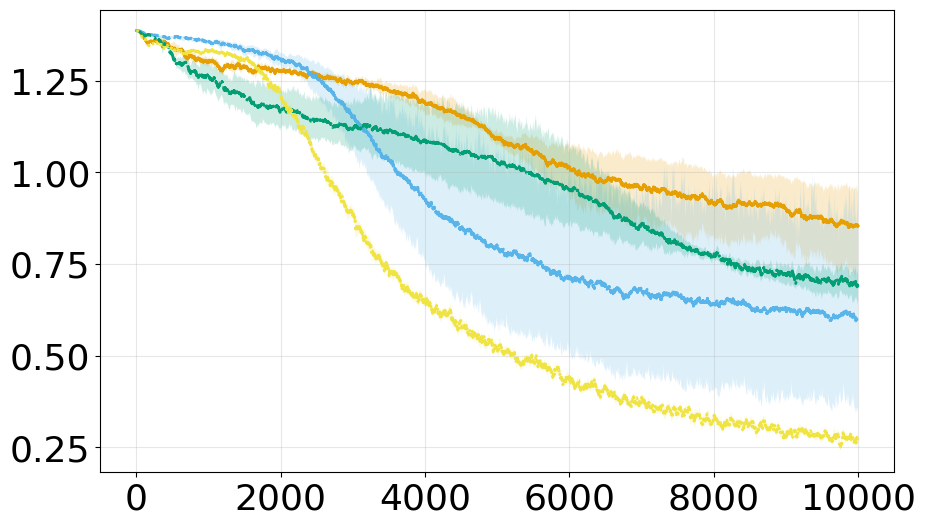

In [20]:
# Blue scale color palette

colorblind_palette = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']#, '#999999'] 
line_styles = ['-', '--', '-.', ':']#, "-"]  # Line styles for differentiation
# legend_prefixes = ["Mixture", "Joint", "Disjoint Reg", "Disjoint", "RandomInit"]
legend_prefixes = [ "Mixture", "Joint", "Disjoint Reg", "Disjoint"]#,  "Random"]

# Set color and line style cycler
plt.rc('axes', prop_cycle=(cycler(color=colorblind_palette) + cycler(linestyle=line_styles)))


# Plot the results
plt.figure(figsize=(10, 6))

for (prefix, stats), label in zip(results.items(),legend_prefixes) :
    x = np.arange(len(stats["means"]))

    # Evaluate splines at finer x points
    mean_smooth = exponential_moving_average(stats["means"], alpha=0.1)
    lower_ci_smooth = exponential_moving_average(stats["lower_ci"], alpha=0.1)
    upper_ci_smooth = exponential_moving_average(stats["upper_ci"], alpha=0.1)

    # Plot smoothed mean and confidence intervals
    plt.plot(x, mean_smooth, label=label, linewidth=2, alpha=0.99)
    plt.fill_between(x, lower_ci_smooth, upper_ci_smooth, alpha=0.2)

# plt.title("Performance", fontsize=14)
#plt.xlabel("Epochs")
#plt.ylabel(plotting_curve)
#plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f"{base_dir}/{plotting_curve}.pdf", format="pdf", dpi=300)
plt.show()